In [28]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [29]:
X = np.load('X.npy')
X.shape

(2169, 45768)

In [30]:
A=np.log2(X+1)
A.shape

(2169, 45768)

In [31]:
np.max(A[:,0])

5.972169178513185

C:\Users\zhaox\anaconda3\lib\site-packages\matplotlib\collections.py:1099: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


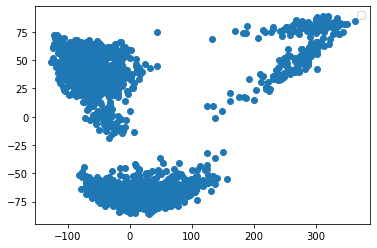

In [62]:
pca = PCA(n_components=50)
components = pca.fit_transform(A)

plot = plt.scatter(components[:,0], components[:,1])
plt.legend(handles=plot.legend_elements()[0])
plt.show()

C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


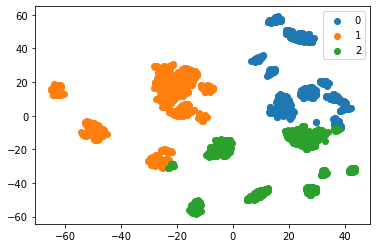

In [16]:
pca = PCA(n_components=50)
A2 = pca.fit_transform(A)
tsne = TSNE(n_components=2,perplexity=40)
TSNEA2 = tsne.fit_transform(A2)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(TSNEA2)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(TSNEA2[label == i , 0] , TSNEA2[label == i , 1] , label = i)
plt.legend()
plt.show()

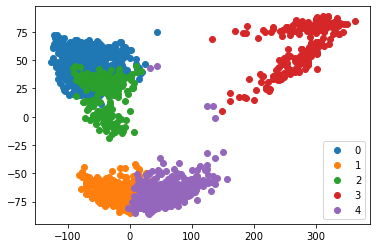

In [64]:
import matplotlib.pyplot as plt

pca = PCA(n_components=50)
A2 = pca.fit_transform(A)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(A2)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(A2[label == i , 0] , A2[label == i , 1] , label = i)
plt.legend()
plt.show()

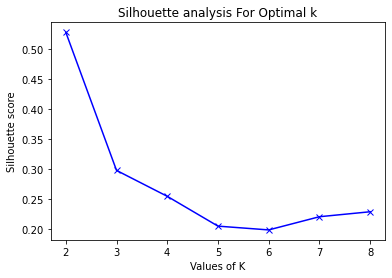

In [65]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(A2)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(A2, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [32]:
kmeans = KMeans(n_clusters= 6)
label = kmeans.fit_predict(A)
label

array([5, 1, 1, ..., 2, 2, 2])

In [33]:
X = A
Y = label
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lm = LogisticRegression(multi_class='ovr', solver='liblinear',penalty='l2')
lm.fit(x_train, y_train)
lm.predict(x_test)
lm.score(x_test, y_test)

0.9831029185867896

In [36]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear',penalty='l1')
lm.fit(x_train, y_train)
lm.predict(x_test)
lm.score(x_test, y_test)

0.9662058371735791

In [8]:
import pandas as pd
sorted_array = np.sort(np.abs(lm.coef_))
sorted_array

array([[0.        , 0.        , 0.        , ..., 0.02305439, 0.02333905,
        0.02409432],
       [0.        , 0.        , 0.        , ..., 0.01018481, 0.01045493,
        0.01045563],
       [0.        , 0.        , 0.        , ..., 0.02174044, 0.03219567,
        0.03998961],
       [0.        , 0.        , 0.        , ..., 0.02238219, 0.02393322,
        0.02411244],
       [0.        , 0.        , 0.        , ..., 0.03465035, 0.046314  ,
        0.04834223],
       [0.        , 0.        , 0.        , ..., 0.0102749 , 0.0107451 ,
        0.01348859]])

In [9]:
sorted_array_concat = np.concatenate(sorted_array)
sorted_array_concat = np.sort(sorted_array_concat)
sorted_array_concat = sorted_array_concat[-100 : ]
sorted_array_concat

array([0.01691266, 0.01695056, 0.01695284, 0.01695503, 0.01697846,
       0.01698345, 0.01698434, 0.01699299, 0.01710253, 0.01713098,
       0.017186  , 0.01720609, 0.01720974, 0.01727782, 0.01734537,
       0.01737789, 0.01738336, 0.01747245, 0.01750429, 0.01755424,
       0.01757022, 0.01765188, 0.01766341, 0.01768228, 0.0176953 ,
       0.01770408, 0.01780827, 0.01781501, 0.01782221, 0.01787297,
       0.01789922, 0.01793885, 0.01794119, 0.0179561 , 0.01800618,
       0.01809628, 0.0181624 , 0.01817102, 0.01829212, 0.01829972,
       0.01830792, 0.01832854, 0.01836578, 0.01849683, 0.0185672 ,
       0.01860219, 0.01861454, 0.01867284, 0.01867496, 0.01869993,
       0.0187179 , 0.01890118, 0.01895953, 0.0189938 , 0.01915169,
       0.01915952, 0.01924313, 0.01932019, 0.01932907, 0.01939513,
       0.01940575, 0.01947343, 0.01950563, 0.01959995, 0.01973846,
       0.01976957, 0.0200923 , 0.0201621 , 0.02026405, 0.02038843,
       0.02068321, 0.02077235, 0.02080332, 0.02114824, 0.02124

In [10]:
list = sorted_array_concat.tolist()

In [11]:
df = pd.DataFrame(np.abs(lm.coef_))
df.shape

(6, 45768)

In [12]:
Result = []
for i in range(5):
    for j in range(45768):
        if df.iloc[i,j] > 0.01667737:
            Result.append(j)

In [13]:
len(Result)

106

## TSNE under different PCA

C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: Future

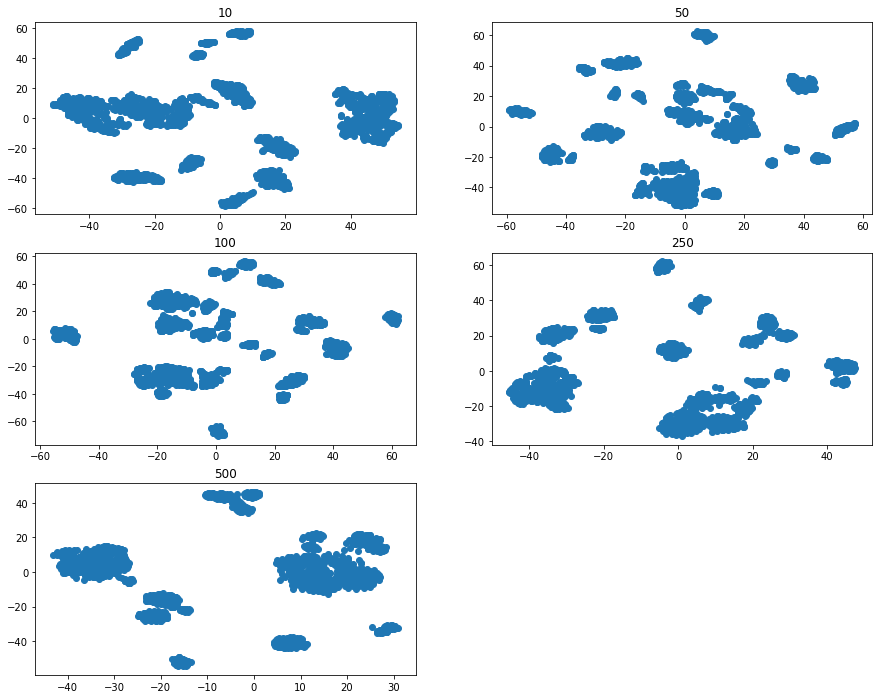

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))
list = [10,50,100,250,500]

for n,value in enumerate(list):
    pca = PCA(n_components=value)
    A2 = pca.fit_transform(A)
    tsne = TSNE(n_components=2,perplexity=40)
    TSNEA2 = tsne.fit_transform(A2)
    ax = plt.subplot(3, 2, n + 1)
    plt.scatter(TSNEA2[:,0], TSNEA2[:,1])
    ax.set_title(value)

plt.show()

C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: Future

ValueError: num must be 1 <= num <= 4, not 5

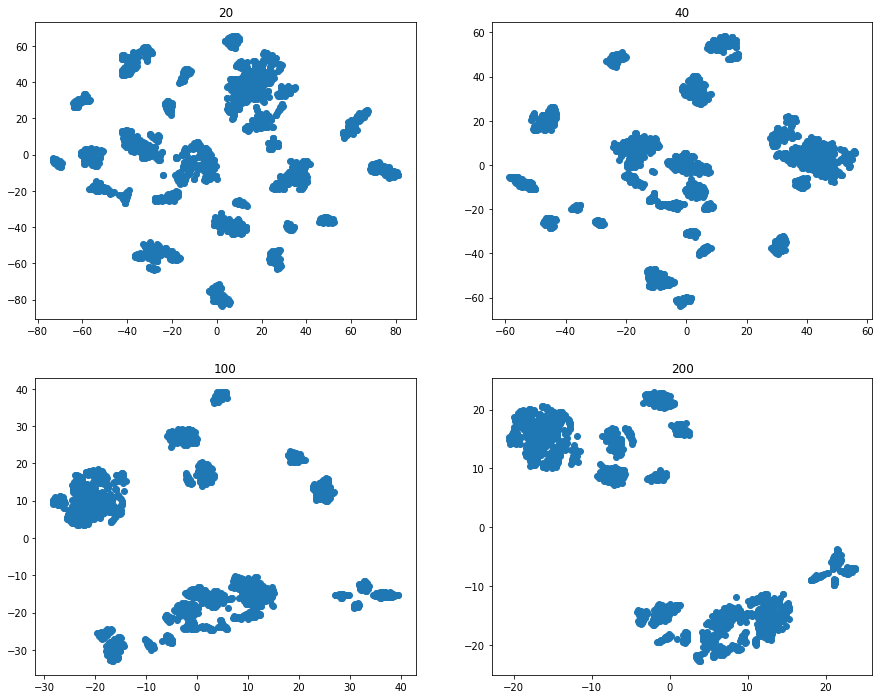

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))
list = [20,40,100,200,500]

for n,value in enumerate(list):
    pca = PCA(n_components=50)
    A2 = pca.fit_transform(A)
    tsne = TSNE(n_components=2,perplexity=value)
    TSNEA2 = tsne.fit_transform(A2)
    ax = plt.subplot(2, 3, n + 1)
    plt.scatter(TSNEA2[:,0], TSNEA2[:,1])
    ax.set_title(value)

plt.show()

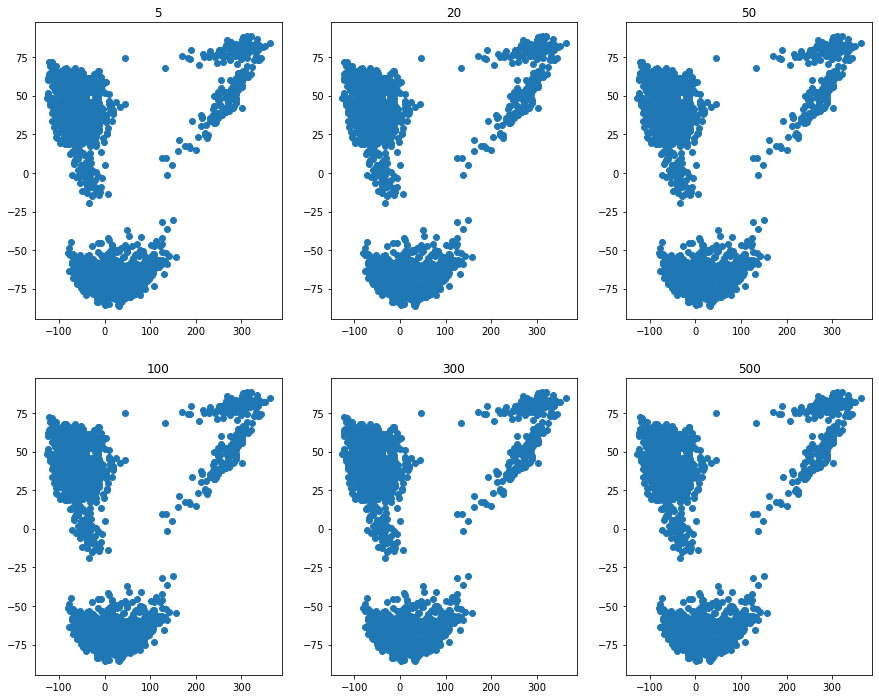

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))
list = [5,20,50,100,300,500]

for n,value in enumerate(list):
    pca = PCA(n_components=value)
    components = pca.fit_transform(A)
    ax = plt.subplot(2, 3, n + 1)
    plt.scatter(components[:,0], components[:,1])
    ax.set_title(value)

plt.show()

C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


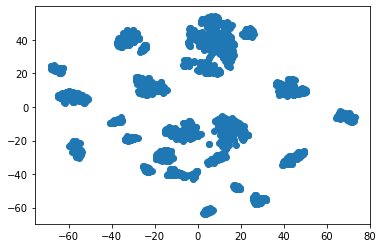

In [20]:
pca = PCA(n_components=50)
A2 = pca.fit_transform(A)
tsne = TSNE(n_components=2,perplexity=500)
TSNEA2 = tsne.fit_transform(A2)
plt.scatter(TSNEA2[:,0], TSNEA2[:,1])

C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


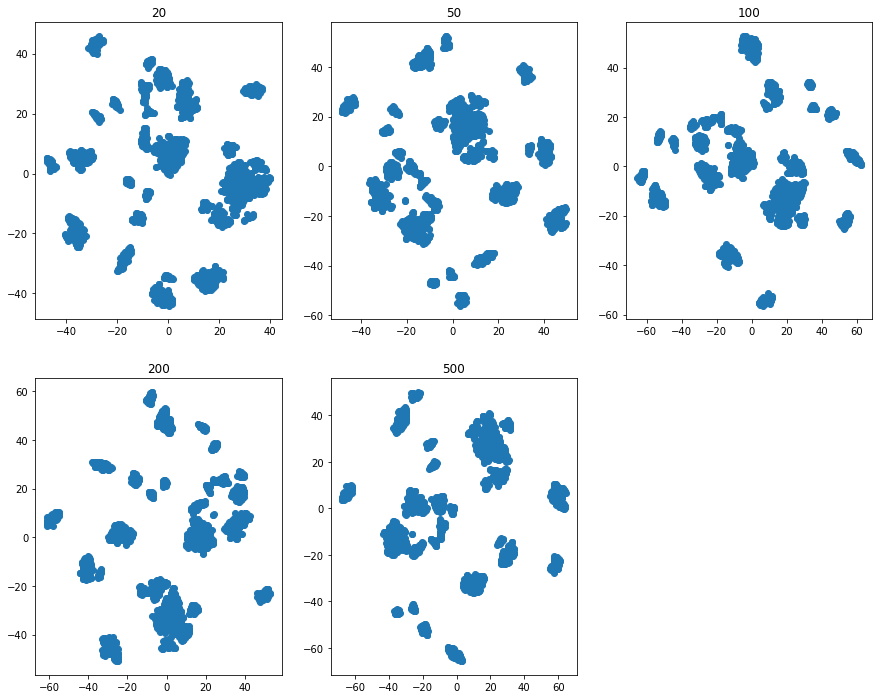

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12))
list = [20,50,100,200,500]

for n,value in enumerate(list):
    pca = PCA(n_components=50)
    A2 = pca.fit_transform(A)
    tsne = TSNE(n_components=2,perplexity=40,learning_rate=value)
    TSNEA2 = tsne.fit_transform(A2)
    ax = plt.subplot(2, 3, n + 1)
    plt.scatter(TSNEA2[:,0], TSNEA2[:,1])
    ax.set_title(value)

plt.show()

C:\Users\zhaox\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


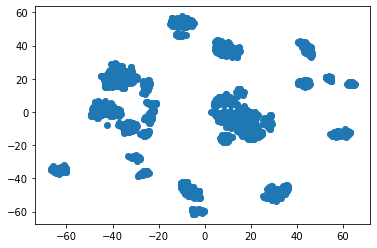

In [42]:
    pca = PCA(n_components=50)
    A2 = pca.fit_transform(A)
    tsne = TSNE(n_components=2,perplexity=40,learning_rate=1000)
    TSNEA2 = tsne.fit_transform(A2)
    plt.scatter(TSNEA2[:,0], TSNEA2[:,1])